<a href="https://colab.research.google.com/github/SushantJha1/Traversymediafirstwebsite/blob/main/FinLabTestQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install linearmodels arch

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from linearmodels.panel import compare
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from statsmodels.stats.stattools import durbin_watson

# Q1

In [ ]:
data = pd.read_csv('/content/Data for Question 1.csv')

In [ ]:
data['ROA'] = data['ROA (%)']
data['RnD'] = data['R&D Expenditure (% of Sales)']
data['DtoE'] = data['Debt-to-Equity']

In [ ]:
# Adding a constant to the model
data = add_constant(data)
# Fixed Effects Model
model = smf.ols('ROA ~ DtoE + RnD + Company_ID + const', data=data)
fixed_effects_result = model.fit()

# Display results
print(fixed_effects_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     10.32
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           5.20e-05
Time:                        10:09:54   Log-Likelihood:                -64.043
No. Observations:                  25   AIC:                             142.1
Df Residuals:                      18   BIC:                             150.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.7208      9.892  

In [ ]:
# Convert your data into a Panel DataFrame
def fiscal_year_to_date(fy_str):
    year = int(fy_str[2:])  # Extract the year (e.g., 2020 from 'FY2020')
    return pd.to_datetime(f'{year}-03-31')  # Convert to last day of fiscal year (e.g., March 31st)

# Apply the function to the 'FiscalYear' column
data['Year'] = data['Year'].apply(fiscal_year_to_date)
data.set_index(['Company_ID', 'Year'], inplace=True)
# Estimate Fixed Effects Model
fe_model = PanelOLS.from_formula('ROA ~ DtoE + RnD + EntityEffects', data=data)
fe_results = fe_model.fit()

# Estimate Random Effects Model
re_model = RandomEffects.from_formula('ROA ~ DtoE + RnD', data=data)
re_results = re_model.fit()

# Hausman Test
print(compare({"Fixed Effects": fe_results, "Random Effects": re_results}))

                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                      ROA               ROA
Estimator                     PanelOLS     RandomEffects
No. Observations                    25                25
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.5016            0.4388
R-Squared (Within)              0.5016            0.4728
R-Squared (Between)            -4.1022            0.2410
R-Squared (Overall)            -3.1038            0.2913
F-statistic                     9.0590            8.9913
P-value (F-stat)                0.0019            0.0013
=====================     ============   ===============
DtoE                           -12.775           -14.392
                             (-2.1256)         (-3.3422)
RnD                             7.6845            3.7464
                              (

# Q2

In [ ]:
df = pd.read_csv('/content/Apollo Hospitals Stock Price History (1).csv')
df.dropna(inplace=True)
df = df.iloc[::-1]
df = df.reset_index(drop=True)

In [ ]:
df.describe()

,Price
count,120.000000
mean,6818.845000
std,367.668394
min,6052.600000
25%,6616.100000
50%,6840.350000
75%,7080.300000
max,7436.750000


In [ ]:
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

closing_prices = df['Price']
# Perform Augmented Dickey-Fuller test
adf_test = adfuller(closing_prices)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Interpretation:
if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -1.743723316597045
p-value: 0.408737253509675
The series is not stationary.


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 332.481
Date:                Thu, 17 Apr 2025   AIC                           -658.962
Time:                        09:54:30   BIC                           -650.625
Sample:                             0   HQIC                          -655.576
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8257      0.099     -8.331      0.000      -1.020      -0.631
ma.L1          0.9614      0.046     21.051      0.000       0.872       1.051
sigma2         0.0002   1.89e-05     11.509      0.0

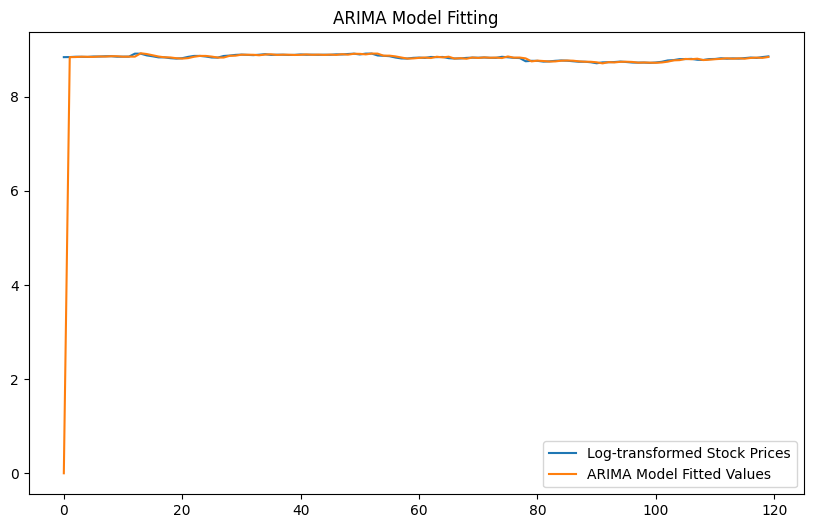

In [ ]:
# Log-transform the closing prices
log_prices = np.log(df['Price'])
# Fit an ARIMA model (order of p, d, q to be determined based on ACF and PACF plots)
arima_model = ARIMA(log_prices, order=(1,1,1))  # (p,d,q) can be tuned based on the analysis
arima_fit = arima_model.fit()

# Print the summary of the ARIMA model
print(arima_fit.summary())

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(log_prices, label='Log-transformed Stock Prices')
plt.plot(arima_fit.fittedvalues, label='ARIMA Model Fitted Values')
plt.legend()
plt.title('ARIMA Model Fitting')
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4823311883.062351
Iteration:      2,   Func. Count:     17,   Neg. LLF: 18200372.51464192
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3472.255443828247
Iteration:      4,   Func. Count:     29,   Neg. LLF: 527043865.4110538
Iteration:      5,   Func. Count:     38,   Neg. LLF: 719449.1625012457
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2572.3303959671553
Iteration:      7,   Func. Count:     50,   Neg. LLF: 36602872.727145605
Iteration:      8,   Func. Count:     56,   Neg. LLF: 13871249757244.865
Iteration:      9,   Func. Count:     66,   Neg. LLF: 232689.69860184952
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1017.8724919357832
Iteration:     11,   Func. Count:     78,   Neg. LLF: 1772273737606.688
Iteration:     12,   Func. Count:     87,   Neg. LLF: 132445.72096043403
Iteration:     13,   Func. Count:     93,   Neg. LLF: 606.0565381820365
Iteration:     14,   Func. Count:    103,   Neg. LLF: -302

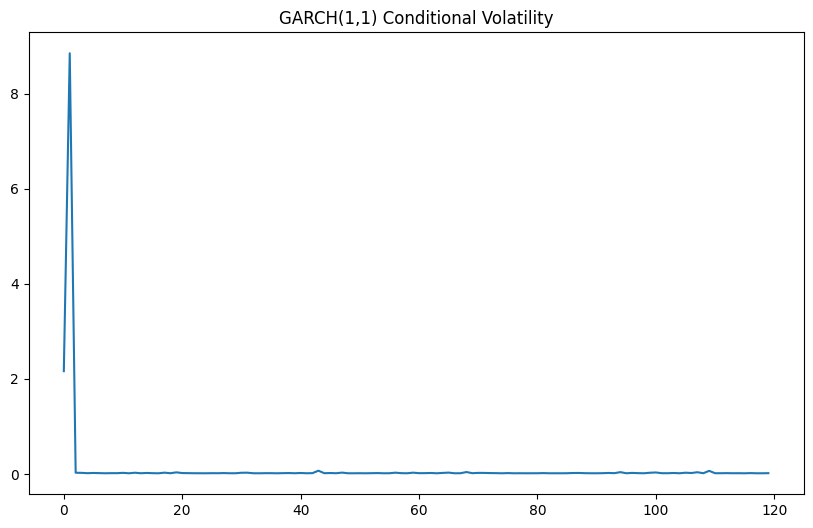

In [ ]:
# Residuals from the ARIMA model
residuals = arima_fit.resid

# Fit GARCH(1,1) model
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Print the summary of the GARCH model
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10,6))
plt.plot(garch_fit.conditional_volatility)
plt.title('GARCH(1,1) Conditional Volatility')
plt.show()

Forecasted Prices (next 5 days):
120    6892.269730
121    6892.188700
122    6892.209235
123    6892.204031
124    6892.205350
Name: predicted_mean, dtype: float64


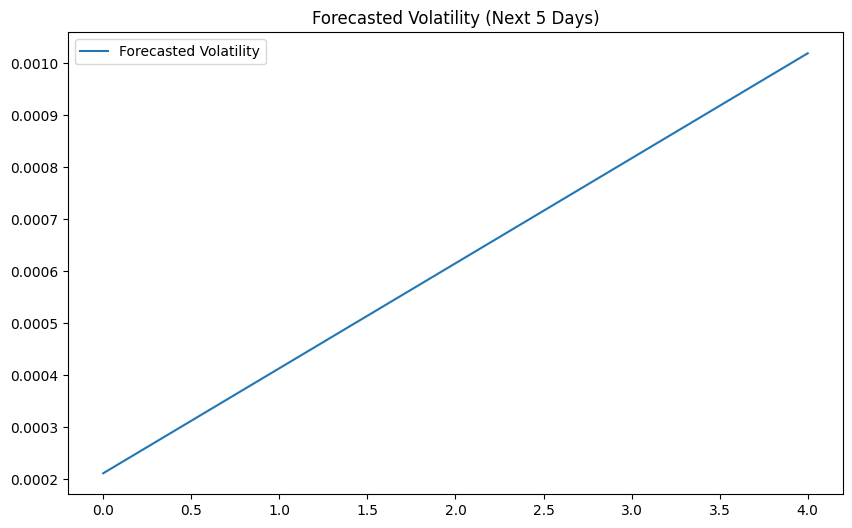

In [ ]:
# Forecast next 5 days with ARIMA model
forecast_days = 5
forecast_values = arima_fit.forecast(steps=forecast_days)

# Convert log-forecast back to price forecast
forecast_prices = np.exp(forecast_values)

print("Forecasted Prices (next 5 days):")
print(forecast_prices)

# Forecast the volatility for the next 5 days using GARCH model
garch_forecast = garch_fit.forecast(horizon=forecast_days)

# Plot the forecasted volatility
plt.figure(figsize=(10,6))
plt.plot(garch_forecast.variance.values[-1, :], label='Forecasted Volatility')
plt.title('Forecasted Volatility (Next 5 Days)')
plt.legend()
plt.show()

# Q3